# BTC predection (LSTM) Real time 


**predict up to 7 minutes in the futures**

In [ ]:
pip install yfinance

In [ ]:
pip install tensorflow


In [ ]:
pip install keras

In [ ]:
pip install matplotlib

In [ ]:
pip install sklearn

### Liberary

In [24]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf


import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

###  Dataset

In [25]:
#testing on finance of yahoo

In [ ]:
pip install gdown

In [40]:
from tensorflow import keras

!gdown  https://drive.google.com/uc?id=11LiG4HO9WfFhhPj1mN9D4vX1vmln_zki
model = keras.models.load_model('btc.h5')

# 7 minutes in the future

[*********************100%***********************]  1 of 1 completed
<class 'numpy.ndarray'>
[47647.77, 48349.74, 48652.73, 48774.465, 48843.895, 48884.844, 48910.402]


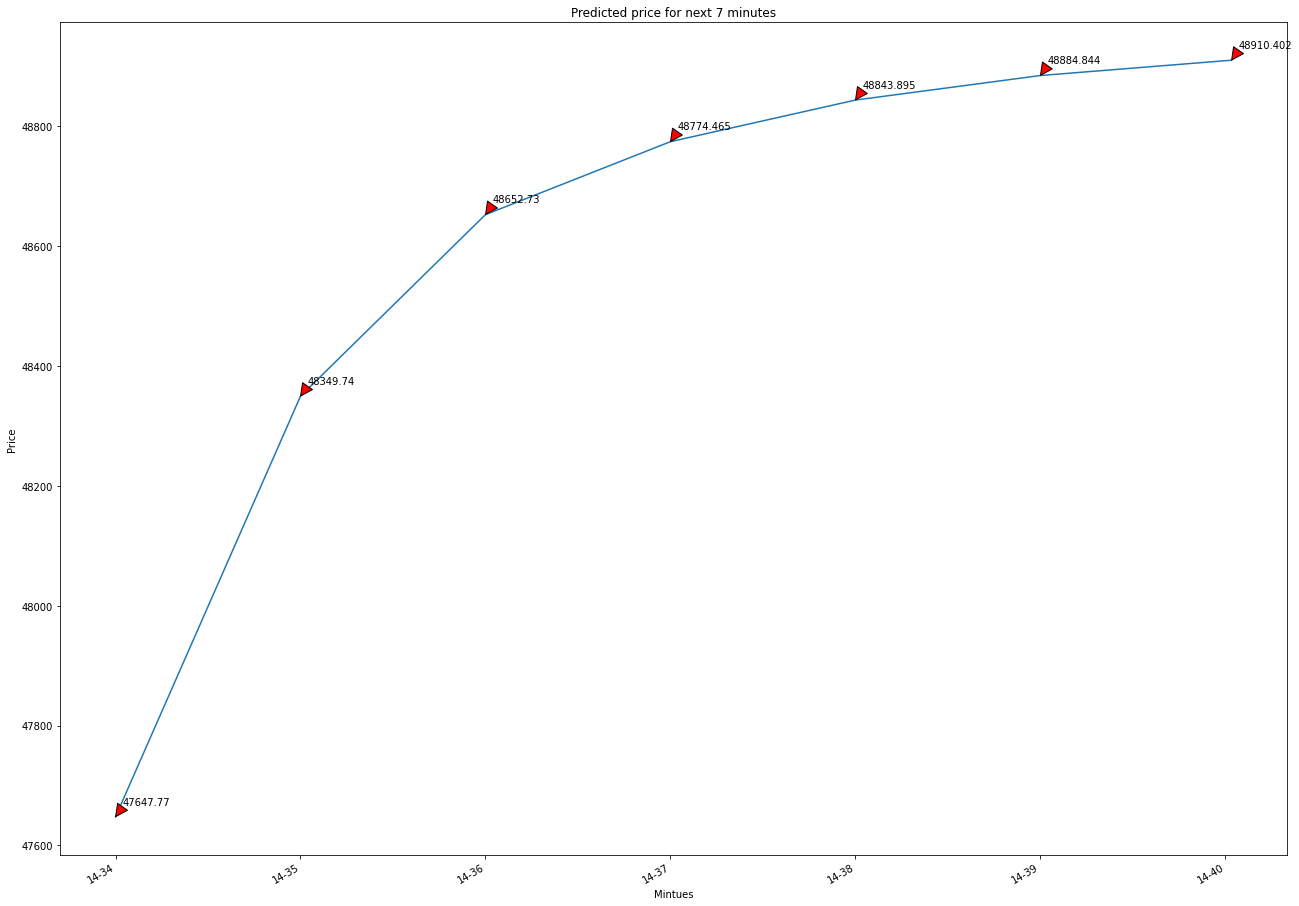

In [42]:
# TEst area for further updates with api 


# Get the data
data = yf.download(tickers='BTC-USD', period = '1d', interval = '1m')

dd = data
df = data['Close'].values
df = df.reshape(-1, 1)
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-5:])
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


############
# predict close price of next 7m

x = x_test[-1]
print(type(x))

num_timesteps = 7
preds = []
for i in range(num_timesteps):
    data = np.expand_dims(x, axis=0)
    #print(data)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first row
    x = np.vstack([x, prediction]) # add prediction

print(preds)

############


# plot up next to next 7 minutes

date_test =pd.to_datetime(dd.reset_index()['Datetime'][-len(preds):])+ datetime.timedelta(minutes=7)

fig, ax = plt.subplots(figsize=(22,17))
ax.plot(date_test,preds)
# Define the date format

date_form = DateFormatter("%H-%M")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MinuteLocator())


fig.autofmt_xdate()


x= date_test
y= preds
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j), xytext=(7,12), textcoords='offset points', arrowprops=dict(facecolor='red', shrink=0.02))

# Set title and labels for axes
ax.set(xlabel="Mintues",
       ylabel="Price",
       title="Predicted price for next 7 minutes",
       )


plt.show()